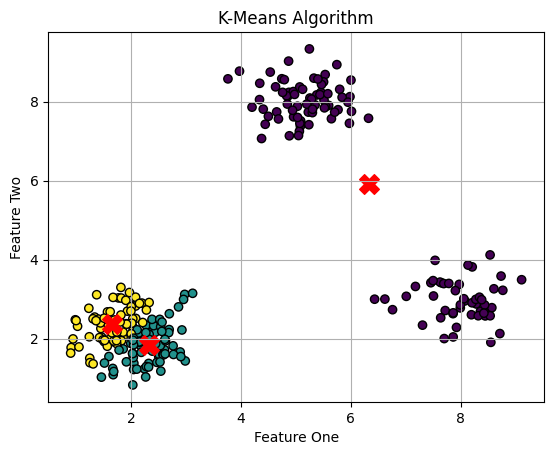

[1 2 2 1 2 1 2 1 2 2 1 1 2 1 1 1 2 1 2 2 1 1 1 1 1 2 2 2 1 2 1 2 1 1 2 1 2
 1 1 1 1 1 2 1 2 2 1 1 2 2 2 2 2 1 2 1 2 2 2 2 1 1 2 2 1 1 2 2 2 1 2 1 1 2
 1 1 1 1 2 1 1 1 1 2 2 1 2 1 2 1 2 2 1 2 1 2 1 2 1 1 2 1 2 2 1 2 1 2 1 1 1
 2 2 2 2 1 1 1 2 2 1 1 2 1 2 1 1 2 2 2 1 1 2 1 1 1 1 2 2 1 2 1 1 2 1 2 2 1
 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


In [28]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate synthetic data
# np.random.seed(42) # 
X = np.vstack((
    np.random.normal([2, 2], 0.5, size=(150, 2)),
    np.random.normal([8, 3], 0.5, size=(50, 2)),
    np.random.normal([5, 8], 0.5, size=(70, 2))
))

# 2. Define the manual KMeans function
def manual_kmeans(X, k, max_iters=100):
    n_samples, n_features = X.shape

    # Randomly initialize centroids by picking k random samples
    # rng = np.random.default_rng(42)
    centroids = X[np.random.choice(n_samples, size=k, replace=False)]

    for iteration in range(max_iters):
        # Step 1: Assign clusters
        distances = np.linalg.norm(X[:, np.newaxis, :] - centroids[np.newaxis, :, :], axis=2)
        labels = np.argmin(distances, axis=1)

        # Step 2: Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Step 3: Check for convergence (no change in centroids)
        if np.allclose(centroids, new_centroids):
            # print(f"Converged after {iteration} iterations.")
            break

        centroids = new_centroids

    return centroids, labels , iteration

# 3. Run manual KMeans
k = 3
centroids, labels, iteration = manual_kmeans(X, k)

# 4. Plot results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X')
plt.title('K-Means Algorithm')
plt.xlabel('Feature One')
plt.ylabel('Feature Two')
plt.grid(True)
plt.show()
print(labels)


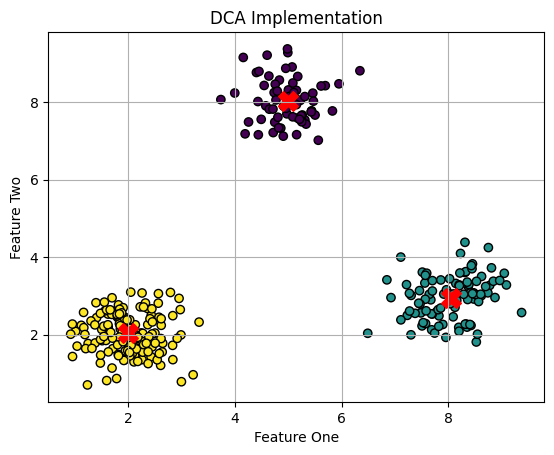

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate synthetic data
X = np.vstack((
    np.random.normal([2, 2], 0.5, size=(150, 2)),
    np.random.normal([8, 3], 0.5, size=(100, 2)),
    np.random.normal([5, 8], 0.5, size=(70, 2))
))

c = 3 #hell yeah
max_itrs = 5000
t_0 = 10 #timestep 
epsilon = .00001
n = len(X)

def row_distances(arr: np.ndarray, ref_idx: int = 0) -> np.ndarray:
    """
    Compute Euclidean distance from row `ref_idx` of `arr` to every row in `arr`.
    
    Parameters
    ----------
    arr : np.ndarray, shape (m, n)
        Input data with m rows and n columns.
    ref_idx : int, default=0
        Index of the reference row.
        
    Returns
    -------
    distances : np.ndarray, shape (m,)
        distances[i] is the Euclidean distance between arr[ref_idx] and arr[i].
    """
    # extract the reference row (shape (n,))
    ref_row = arr[ref_idx]
    # subtract it from every row, broadcast over rows → shape (m, n)
    diffs = arr - ref_row
    # compute row-wise Euclidean norm → shape (m,)
    distances = np.linalg.norm(diffs, axis=1)
    return distances

def DCA(X,max_itrs,epsilon,t_0,c):

    """
    X: n by dim array of data to cluster
    l: iteration 
    k: variable for number of points
    n: total number of points
    i: specific cluster
    c: number of clusters
    u: (o or 1) probability point is in cluster i
    """

    def boundary_box(_X):
        dims = np.shape(_X)[1]
        # print(np.shape(_X))
        # print(dims,'dims')
        alpha = np.zeros(dims)
        beta = np.zeros(dims)

        for d in range(dims):
            alpha[d] = np.min(X[:,d]) # these are the smallest values in each dim
            beta[d] = np.max(X[:,d])  # these are the largest values in each dim

        return np.array([alpha,beta]) 

    def init_centriods(X_, c_,r):
        # rng = np.random.default_rng()
        latch = 0
        half = np.mean(row_distances(X))
        while latch ==0:
            V = X_[np.random.choice(X_.shape[0], size=c_, replace=False)]
            
            # print(np.mean(row_distances(V)),half)
            if np.mean(row_distances(V))>half:
                
                latch=1


        return V
    


    def cluster_assignment(X_,V_):
        # print(X_[:, np.newaxis, :])
        # print(V_[np.newaxis, :, :])
        distances = np.linalg.norm(X_[:, np.newaxis, :] - V_[np.newaxis, :, :], axis=2)
        labels = np.argmin(distances, axis=1)
        U_ = np.zeros((len(V_),len(X_)))

        for i in range(np.shape(V_)[0]):
            temp = np.zeros_like(labels)
            temp[labels==i]=1
            U_[i,:]=temp
            
        return U_

    def rho_getter(X_,r_):
        n = len(X_)
        mags = np.linalg.norm(X_,axis=1)
        # print(mags)
        max_mag = np.max(mags)
        # print(max_mag)
        alpha = r_ + max_mag
        rho = n*(1/n*alpha**2+1+np.sqrt((1/n*alpha**2+1)**2+16/n*alpha**2))
        return rho
    
    r_squ = 0
    for k in range(n):
        r_squ+=np.linalg.norm(X[k,:])

    r= np.sqrt(r_squ)
    #Initiallize centriods# 
    #calculated box T, and randomly guess within box
    T = boundary_box(X)
    V = init_centriods(X,c,r)
    U = cluster_assignment(X,V)
    # print(U)

    
    rho = rho_getter(X,r) ## Left off here 

    for l in range(max_itrs):

        Y = np.zeros_like(U)
        Z = np.zeros_like(V)
        for i in range(c):
            sumation = np.zeros_like((V[i,:]))
            for k in range(n):
                t = t_0
                # print()
                Y[i,k] = ((rho*U[i,k]-2*U[i,k])*np.linalg.norm(X[k,:]-V[i,:])**2 + 2*t*U[i,k]-t)

                # print(Y[i,k],(rho*U[i,k]-2*U[i,k]),np.linalg.norm(X[k,:]-V[i,:])**2,2*t*U[i,k]-t)
                sumation += (V[i,:]-X[k,:])*U[i,k]**2
            # print(V[i,:])
            # print(sumation)
            Z[i,:] = (rho*V[i,:]-2*sumation) 

        U_2 = np.zeros_like(U) # reset U
        # projects Y onto delta_K (ie, assignes pts to clusters)
        for k in range(n):
            U_2[np.argmax(Y[:,k],axis=0,),k]=1 
    

        V_2 = np.zeros_like(V) # reset U
        #project Z into the ball of radius r
        for i in range(c):
            if np.linalg.norm(Z[i,:])<= rho*r:
                V_2[i,:] =  Z[i,:]/rho
            else:
                V_2[i,:] = Z[i,:]*r/np.linalg.norm(Z[i,:])/rho
        
        if (np.linalg.norm(V_2-V)+np.linalg.norm(U_2-U))< epsilon:
            # print(np.linalg.norm(V_2-V)+np.linalg.norm(U_2-U),epsilon,l)
            V = V_2
            U = U_2
            labels = np.zeros_like(U_2[0,:])
            for i in range(c):
                labels+=(U_2[i,:]*(i+1))
            return V, labels,l

        V = V_2
        U = U_2

    labels = np.zeros_like(U_2[0,:])
    for i in range(c):
        labels+=(U_2[i,:]*(i+1)) 

    return V, labels,l

# 4. Plot results
# print('truth', np.sum(X,axis=0)/len(X))
V, labels,last_itr = DCA(X,max_itrs,epsilon,t_0,3)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(V[:, 0], V[:, 1], c='red', s=200, marker='X')
plt.title('DCA Implementation')
plt.xlabel('Feature One')
plt.ylabel('Feature Two')
plt.grid(True)
plt.show()
# print(labels)



In [ ]:
import numpy as np
from scipy.spatial.distance import cdist

# Example array
arr = np.array([
    [1, 2],
    [3, 4],
    [5, 6],
    [7, 8]
])

# Choose a reference row, e.g., the first row
reference_row = arr[0].reshape(1, -1)

# Calculate Euclidean distances from reference_row to each other row
distances = cdist(reference_row, arr, metric='euclidean')[0]

print(distances)

[0.         2.82842712 5.65685425 8.48528137]


In [ ]:
# np.random.seed(42) # 
from scipy.spatial.distance import cdist

def count_differences(arr1, arr2):
    return sum(a != b for a, b in zip(arr1, arr2))

def boundary_box(_X):
    dims = np.shape(_X)[1]
    # print(np.shape(_X))
    # print(dims,'dims')
    alpha = np.zeros(dims)
    beta = np.zeros(dims)

    for d in range(dims):
        alpha[d] = np.min(_X[:,d]) # these are the smallest values in each dim
        beta[d] = np.max(_X[:,d])  # these are the largest values in each dim

    return np.array([alpha,beta]) 

def init_centriods_old(T_,c):
    V = []
    for d in range(np.shape(T_)[1]):
        V.append(np.random.uniform(low=T_[0,d],high=T_[1,d], size=(c)))

    V = np.array(V).T

    # print(V)
    return V

def row_distances(arr: np.ndarray, ref_idx: int = 0) -> np.ndarray:
    """
    Compute Euclidean distance from row `ref_idx` of `arr` to every row in `arr`.
    
    Parameters
    ----------
    arr : np.ndarray, shape (m, n)
        Input data with m rows and n columns.
    ref_idx : int, default=0
        Index of the reference row.
        
    Returns
    -------
    distances : np.ndarray, shape (m,)
        distances[i] is the Euclidean distance between arr[ref_idx] and arr[i].
    """
    # extract the reference row (shape (n,))
    ref_row = arr[ref_idx]
    # subtract it from every row, broadcast over rows → shape (m, n)
    diffs = arr - ref_row
    # compute row-wise Euclidean norm → shape (m,)
    distances = np.linalg.norm(diffs, axis=1)
    return distances

def init_centriods(X_, c_,heuristic=False):
        # rng = np.random.default_rng()
        latch = 0
        if heuristic:
            spread = np.mean(row_distances(X))
            while latch ==0:
                V = X_[np.random.choice(X_.shape[0], size=c_, replace=False)]
                
                # print(np.mean(row_distances(V)),half)
                if np.mean(row_distances(V))>spread:
                    
                    latch=1
        else:
            V = X_[np.random.choice(X_.shape[0], size=c_, replace=False)]

        return V

def cluster_assignment(X_,V_):
    # print(X_[:, np.newaxis, :])
    # print(V_[np.newaxis, :, :])
    # np.random.seed(42) # 

    distances = np.linalg.norm(X_[:, np.newaxis, :] - V_[np.newaxis, :, :], axis=2
                                )
    # print(distances)
    labels = np.argmin(distances, axis=1)
    # print(labels,'labels')
    U_ = np.zeros((np.shape(V_)[0],len(X_)))

    # print(np.shape(V_)[0])
    for i in range(np.shape(V_)[0]):
        temp = np.zeros_like(labels)
        temp[labels==i]=1
        U_[i,:]=temp
        
    return U_

def rho_getter(X_,r_):
    n = len(X_)
    mags = np.linalg.norm(X_,axis=1)
    # print(mags)
    max_mag = np.max(mags)
    # print(max_mag)
    alpha = r_ + max_mag
    rho = n*(1/n*alpha**2+1+np.sqrt((1/n*alpha**2+1)**2+16/n*alpha**2))
    return rho

def DCA(X,max_itrs,epsilon,t_0,c):

    """
    X: n by dim array of data to cluster
    l: iteration 
    k: variable for number of points
    n: total number of points
    i: specific cluster
    c: number of clusters
    u: (o or 1) probability point is in cluster i
    """

    n = len(X)
    r_squ = 0
    for k in range(n):
        r_squ+=np.linalg.norm(X[k,:])

    r= np.sqrt(r_squ)
    #Initiallize centriods# 
        #calculated box T, and randomly guess within box
    T = boundary_box(X)
    V_old = init_centriods_old(T,c)
    V = init_centriods(X,c,r)
    print('V',V_old,V)
    U = cluster_assignment(X,V)

    
    # print(r,'r')
    rho = rho_getter(X,r) ## Left off here 

    for l in range(max_itrs):

        Y = np.zeros_like(U)
        Z = np.zeros_like(V)
        for i in range(c):
            sumation = np.zeros_like((V[i,:]))
            for k in range(n):
                t = t_0
                Y[i,k] = ((rho*U[i,k]-2*U[i,k])*np.linalg.norm(X[k,:]-V[i,:])**2 + 2*t*U[i,k]-t)

                sumation += (V[i,:]-X[k,:])*U[i,k]**2

            Z[i,:] = (rho*V[i,:]-2*sumation) 
        # print(Z,'z')
        # print(Y,'y')
        U_2 = np.zeros_like(U) # reset U
        # projects Y onto delta_K (ie, assignes pts to clusters)
        for k in range(n):
            U_2[np.argmax(Y[:,k],axis=0,),k]=1 
        

        V_2 = np.zeros_like(V) # reset V
        #project Z into the ball of radius r
        for i in range(c):
            if np.linalg.norm(Z[i,:])<= rho*r:
                V_2[i,:] =  Z[i,:]/rho
            else:
                V_2[i,:] = Z[i,:]*r/np.linalg.norm(Z[i,:])/rho
        
        if (np.linalg.norm(V_2-V)+np.linalg.norm(U_2-U))< epsilon:
            print(np.linalg.norm(V_2-V)+np.linalg.norm(U_2-U),epsilon,l)
            V = V_2
            U = U_2
            labels = np.zeros_like(U_2[0,:])
            for i in range(c):
                labels+=(U_2[i,:]*(i))
            # print(U)
            return V, labels,l,U, Y

        V = V_2
        U = U_2

    labels = np.zeros_like(U_2[0,:])
    for i in range(c):
        labels+=(U_2[i,:]*(i)) 

    return V, labels,l, U, Y
    # return

array = []

with open('./house-votes-84.data', 'r') as file:
    for line in file:
        values = line.strip().split(',')
        array.append(values)

# print(array)
for i, line in enumerate(array):
    array[i] = [1 if val == 'y' else -1 if val == 'n' else 0 if val =='?' else 0 if val =='?' else 0 if val =='republican' else 1 if val =='democrat' else val for val in line]

parties = [row[0] for row in array]
# Remaining data
votes = [row[1:] for row in array]

votes = np.array(votes)

V, labels,last_itr,U,Y = DCA(votes.astype(float),max_itrs,epsilon,t_0=100,c=2)
# print(labels.astype(int))
mse = ((labels - parties)**2).mean()
print(mse)
print(1-mse)
np.random.seed(0) # 

cent, labels, i =manual_kmeans(votes, 2)
# print(np.abs(labels-2),parties)

mse = ((labels - parties)**2).mean()
print(mse)
print(1-mse)



# U


V [[ 0.86827792 -0.91986923 -0.95931755 -0.61583217 -0.58896476 -0.62957247
  -0.83265788  0.78835761 -0.27201898 -0.01986726  0.81018985  0.82810833
  -0.28392405 -0.56858361  0.17583112 -0.20693189]
 [ 0.96327128 -0.47499961 -0.6278974  -0.84391951 -0.68113015  0.55274123
  -0.0705975  -0.51934225  0.54103149  0.46466074 -0.09918934  0.4597851
  -0.63194586 -0.79111874  0.84643424 -0.18480594]] [[-1.  1. -1.  1.  1.  1. -1. -1. -1.  1. -1.  1.  1.  1. -1.  1.]
 [ 1. -1.  1. -1. -1. -1.  1.  1.  1. -1. -1. -1. -1. -1.  1.  0.]]
2
9.6317957472845e-06 1e-05 155
0.12413793103448276
0.8758620689655172
Converged after 6 iterations.
0.12183908045977011
0.8781609195402299


In [ ]:
T = boundary_box(votes)
# print(T,'t')
V = init_centriods_old(T,c=2)
def init_centriods(X_, c_):
        rng = np.random.default_rng()
        V = X_[rng.choice(X_.shape[0], size=c_, replace=False)]

        return V
V2 = init_centriods(votes,c_=2)
V,V2

# print(V,'v')
# U = cluster_assignment(votes,V)
# U
# # print(labels)
# # print(np.array(parties).astype(float))
# # Y
# for k in range(n):
#     U[np.argmax(Y[:,k],axis=0,),k]=1 
# U
# votes

(array([[ 0.25879728, -0.09091787,  0.16862862, -0.90910724,  0.90082297,
         -0.08868649, -0.44523763, -0.07260319,  0.16731222,  0.94878962,
          0.39632343, -0.38094477,  0.36946235,  0.82185437,  0.89959983,
          0.22683039],
        [ 0.39149738,  0.25511616,  0.80231602, -0.43807362,  0.78052757,
          0.2402652 , -0.62375768, -0.29329554, -0.84453073,  0.97242149,
          0.07219273,  0.62759004, -0.67476612,  0.64507449,  0.45143902,
         -0.16351393]]),
 array([[-1,  1, -1,  1,  1,  1, -1,  0, -1, -1,  0,  0,  0,  1, -1,  0],
        [-1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1]]))

In [ ]:
cent, labels =manual_kmeans(votes, 2)
print(np.abs(labels-2),parties)

mse = ((labels - parties)**2).mean()
print(mse)
parties, labels

Converged after 3 iterations.
[2 2 2 2 2 2 2 2 2 1 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 1 1 1 2 1 2 1 1 2 1 2 2
 2 2 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 2 2 2 2 2 1 2 1 1 1 2 2 2 1 1 1 1 1 2
 1 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 2 1 2 2 1 1 2 1 1 2 2 1 1 1
 2 1 2 1 1 1 2 1 2 2 2 2 2 1 2 2 1 1 1 1 1 2 2 2 2 2 1 1 1 1 2 2 1 1 1 2 1
 2 1 2 2 1 1 2 2 2 1 2 1 2 2 2 2 2 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 2 2 1 1 1 2 1 2 1 1 1 1 1 1 2 1 2 2 1 1 1 2 1 1 2 2 1 2 1 1 1 1
 1 2 2 2 1 1 2 2 2 2 1 2 1 2 1 1 1 2 2 1 2 1 1 1 1 2 1 1 2 2 1 2 1 1 2 2 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 2 2 2 2 2 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 1 2
 2 1 1 1 2 1 2 2 2 2 2 1 2 1 2 1 1 2 2 2 2 1 1 1 1 1 2 2 2 2 1 2 1 1 2 1 1
 1 1 2 1 1 1 2 2 1 1 2 1 2 2 2 1 2 1 2 1 2 1 1 2 2 1 2 1 1 1 2 2 2 1 1 1 2
 1 1 2 2 2 2 1 2 2 2 1 1 2 1 2 2 1 1 2 1 2 1 2 1 2 1 1 2 1 2 2 2 1 2 2 2 2
 2 1 2 2 1 2 2 1 1 2 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 2 2 2] [0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

([0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,


In [22]:
# np.random.seed(42) # 
import numpy as np
from scipy.spatial.distance import cdist
import time
def count_differences(arr1, arr2):
    return sum(a != b for a, b in zip(arr1, arr2))

def manual_kmeans(X, k, max_iters=100,h=False):
    n_samples, n_features = X.shape

    # Randomly initialize centroids by picking k random samples
    # rng = np.random.default_rng(42)
    
    centroids = X[np.random.choice(n_samples, size=k, replace=False)]

    if h==True:
        
        spread = np.mean(row_distances(X))
        counter = 0
        latch=0
        while latch ==0 and counter !=100:
            centroids = X[np.random.choice(X.shape[0], size=k, replace=False)]
            
            # print(np.mean(row_distances(V)),half)
            if np.mean(row_distances(centroids))>spread:
                
                latch=1
            counter+=1
    for iteration in range(max_iters):
        # Step 1: Assign clusters
        distances = np.linalg.norm(X[:, np.newaxis, :] - centroids[np.newaxis, :, :], axis=2)
        labels = np.argmin(distances, axis=1)

        # Step 2: Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Step 3: Check for convergence (no change in centroids)
        if np.allclose(centroids, new_centroids):
            # print(f"Converged after {iteration} iterations.")
            break

        centroids = new_centroids

    return centroids, labels , iteration

def boundary_box(_X):
    dims = np.shape(_X)[1]
    # print(np.shape(_X))
    # print(dims,'dims')
    alpha = np.zeros(dims)
    beta = np.zeros(dims)

    for d in range(dims):
        alpha[d] = np.min(_X[:,d]) # these are the smallest values in each dim
        beta[d] = np.max(_X[:,d])  # these are the largest values in each dim

    return np.array([alpha,beta]) 

def init_centriods_old(T_,c):
    V = []
    for d in range(np.shape(T_)[1]):
        V.append(np.random.uniform(low=T_[0,d],high=T_[1,d], size=(c)))

    V = np.array(V).T

    # print(V)
    return V

def row_distances(arr: np.ndarray, ref_idx: int = 0) -> np.ndarray:
    """
    Compute Euclidean distance from row `ref_idx` of `arr` to every row in `arr`.
    
    Parameters
    ----------
    arr : np.ndarray, shape (m, n)
        Input data with m rows and n columns.
    ref_idx : int, default=0
        Index of the reference row.
        
    Returns
    -------
    distances : np.ndarray, shape (m,)
        distances[i] is the Euclidean distance between arr[ref_idx] and arr[i].
    """
    # extract the reference row (shape (n,))
    ref_row = arr[ref_idx]
    # subtract it from every row, broadcast over rows → shape (m, n)
    diffs = arr - ref_row
    # compute row-wise Euclidean norm → shape (m,)
    distances = np.linalg.norm(diffs, axis=1)
    return distances

def init_centriods(X_, c_,heuristic=False):
        # rng = np.random.default_rng()
        latch = 0
        if heuristic:
            spread = np.mean(row_distances(X))
            counter = 0
            while latch ==0 and counter !=100:
                V = X_[np.random.choice(X_.shape[0], size=c_, replace=False)]
                
                # print(np.mean(row_distances(V)),half)
                if np.mean(row_distances(V))>spread:
                    
                    latch=1
                counter+=1
        else:
            V = X_[np.random.choice(X_.shape[0], size=c_, replace=False)]

        return V

def cluster_assignment(X_,V_):
    # print(X_[:, np.newaxis, :])
    # print(V_[np.newaxis, :, :])
    # np.random.seed(42) # 

    distances = np.linalg.norm(X_[:, np.newaxis, :] - V_[np.newaxis, :, :], axis=2
                                )
    # print(distances)
    labels = np.argmin(distances, axis=1)
    # print(labels,'labels')
    U_ = np.zeros((np.shape(V_)[0],len(X_)))

    # print(np.shape(V_)[0])
    for i in range(np.shape(V_)[0]):
        temp = np.zeros_like(labels)
        temp[labels==i]=1
        U_[i,:]=temp
        
    return U_

def rho_getter(X_,r_):
    n = len(X_)
    mags = np.linalg.norm(X_,axis=1)
    # print(mags)
    max_mag = np.max(mags)
    # print(max_mag)
    alpha = r_ + max_mag
    rho = n*(1/n*alpha**2+1+np.sqrt((1/n*alpha**2+1)**2+16/n*alpha**2))
    return rho

def DCA(X,max_itrs,epsilon,t_0,c,h):

    """
    X: n by dim array of data to cluster
    l: iteration 
    k: variable for number of points
    n: total number of points
    i: specific cluster
    c: number of clusters
    u: (o or 1) probability point is in cluster i
    """

    n = len(X)
    r_squ = 0
    for k in range(n):
        r_squ+=np.linalg.norm(X[k,:])

    r= np.sqrt(r_squ)
    #Initiallize centriods# 
        #calculated box T, and randomly guess within box
    T = boundary_box(X)
    # V_old = init_centriods_old(T,c)
    V = init_centriods(X,c,h)
    # print('V',V_old,V)
    U = cluster_assignment(X,V)

    
    # print(r,'r')
    rho = rho_getter(X,r)## Left off here 

    for l in range(max_itrs):

        Y = np.zeros_like(U)
        Z = np.zeros_like(V)
        for i in range(c):
            sumation = np.zeros_like((V[i,:]))
            for k in range(n):
                t = t_0
                Y[i,k] = ((rho*U[i,k]-2*U[i,k])*np.linalg.norm(X[k,:]-V[i,:])**2 + 2*t_0*U[i,k]-t_0)

                sumation += (V[i,:]-X[k,:])*U[i,k]**2

            Z[i,:] = (rho*V[i,:]-2*sumation) 
        # print(Z,'z')
        # print(Y,'y')
        U_2 = np.zeros_like(U) # reset U
        # projects Y onto delta_K (ie, assignes pts to clusters)
        for k in range(n):
            U_2[np.argmax(Y[:,k],axis=0,),k]=1 
        

        V_2 = np.zeros_like(V) # reset V
        #project Z into the ball of radius r
        for i in range(c):
            if np.linalg.norm(Z[i,:])<= rho*r:
                V_2[i,:] =  Z[i,:]/rho
            else:
                V_2[i,:] = Z[i,:]*r/np.linalg.norm(Z[i,:])#/rho
        
        if (np.linalg.norm(V_2-V)+np.linalg.norm(U_2-U))< epsilon:
            # print(np.linalg.norm(V_2-V)+np.linalg.norm(U_2-U),epsilon,l)
            V = V_2
            U = U_2
            labels = np.zeros_like(U_2[0,:])
            for i in range(c):
                labels+=(U_2[i,:]*(i))
            # print(U)
            return V, labels,l,U, Y

        V = V_2
        U = U_2

    labels = np.zeros_like(U_2[0,:])
    for i in range(c):
        labels+=(U_2[i,:]*(i)) 

    return V, labels,l, U, Y
    # return

array = []

with open('./house-votes-84.data', 'r') as file:
    for line in file:
        values = line.strip().split(',')
        array.append(values)

# print(array)
for i, line in enumerate(array):
    array[i] = [1 if val == 'y' else -1 if val == 'n' else 0 if val =='?' else 0 if val =='?' else 1 if val =='republican' else 0 if val =='democrat' else val for val in line]

parties = [row[0] for row in array]
# Remaining data
votes = [row[1:] for row in array]

votes = np.array(votes)


kmeans_perf=[]
dca_perf2=[]

for i in range(100):
    np.random.seed(i) # 
    t0 = time.time()
    V, labels,last_itr,U,Y = DCA(votes.astype(float),max_itrs=1000,epsilon=.000001,t_0=1,c=2,h=True)
    t1= time.time()-t0
    # print(t1)
    diff = count_differences(labels,parties)/len(labels)
    # print([[diff,1-diff].sort(),t1])
    if diff <.5:
        diff = 1-diff
    dca_perf2.append([diff,t1,last_itr])

    t0 = time.time()
    cent, labels,iteration =manual_kmeans(votes, 2,h=True)
    t1= time.time()-t0    
    diff = count_differences(labels,parties)/len(labels)
    if diff <.5:
        diff = 1-diff

    # print(mse)
    # print(1-mse)
    kmeans_perf.append([diff,t1,iteration])


# U
print(np.mean(np.array(kmeans_perf),axis=0))
print(np.mean(np.array(dca_perf2),axis=0))


[8.78735632e-01 1.65606499e-03 4.19000000e+00]
[  0.84556322   0.5434317  201.21      ]


In [ ]:
import time 
kmeans_perf=[]
dca_perf2=[]

def manual_kmeans(X, k, max_iters=100,h=False):
    n_samples, n_features = X.shape

    # Randomly initialize centroids by picking k random samples
    # rng = np.random.default_rng(42)
    
    centroids = X[np.random.choice(n_samples, size=k, replace=False)]

    if h==True:
        
        spread = np.mean(row_distances(X))
        counter = 0
        latch=0
        while latch ==0 and counter !=100:
            centroids = X[np.random.choice(X.shape[0], size=k, replace=False)]
            
            # print(np.mean(row_distances(V)),half)
            if np.mean(row_distances(centroids))>spread:
                
                latch=1
            counter+=1
    for iteration in range(max_iters):
        # Step 1: Assign clusters
        distances = np.linalg.norm(X[:, np.newaxis, :] - centroids[np.newaxis, :, :], axis=2)
        labels = np.argmin(distances, axis=1)

        # Step 2: Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Step 3: Check for convergence (no change in centroids)
        if np.allclose(centroids, new_centroids):
            # print(f"Converged after {iteration} iterations.")
            break

        centroids = new_centroids

    return centroids, labels , iteration



#ground truth scores 
total_pts = 200
for i in range(0,100):
    np.random.seed(i) # 

    random_pts = np.random.uniform(low=[-5,-5],high=[5,5], size=(2, 2))
    size_cluster_1 = int(np.random.uniform(low=[50],high=[150],size=(1)))
    size_cluster_2 = total_pts - size_cluster_1
    # print(random_pts)

    #ground truths
    parties = np.zeros(len(X))
    parties[0:size_cluster_1] = 0
    parties[size_cluster_2:total_pts-1] = 1

    # print(random_pts,size_cluster_1,size_cluster_2)
    X = np.vstack((
    np.random.normal(random_pts[0], 0.5, size=(size_cluster_1, 2)),
    np.random.normal(random_pts[1], 0.5, size=(size_cluster_2, 2)),
    # np.random.normal([5, 8], 0.2, size=(70, 2))
    ))
    t0 = time.time()
    V, labels,last_itr,U,Y = DCA(X.astype(float),max_itrs=1000,epsilon=.000001,t_0=1,c=2,h=False)
    t1= time.time()-t0
    # print(parties,labels)
    # for i in range(c):
    # diff = count_differences(labels,parties)/len(labels)
    # print([[diff,1-diff].sort(),t1])
    if diff <.5:
        diff = 1-diff
    dca_perf2.append([diff,t1,last_itr])
    # print(diff)
    t0 = time.time()
    cent, labels,iteration =manual_kmeans(votes, 2,h=False)
    # print(parties,labels)

    t1= time.time()-t0    
    diff = count_differences(labels,parties)/len(labels)
    if diff <.5:
        diff = 1-diff

        
    kmeans_perf.append([diff,t1,iteration])
    # print(diff)

print(np.mean(np.array(kmeans_perf),axis=0))
print(np.mean(np.array(dca_perf2),axis=0))


/tmp/ipykernel_205561/3798330928.py:51: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  size_cluster_1 = int(np.random.uniform(low=[50],high=[150],size=(1)))
/tmp/ipykernel_205561/3798330928.py:32: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
/home/megrad/.local/lib/python3.10/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[7.71126437e-01 5.69398403e-04 5.79000000e+00]
[  0.77218391   0.39015507 318.53      ]


In [ ]:
#analize results

print(np.mean(np.array(kmeans_perf),axis=0))
print(np.mean(np.array(dca_perf2),axis=0))


[7.71448276e-01 4.73623276e-04 5.06000000e+00]
[  0.73895      0.31155358 260.89      ]
